In [1]:
import svgwrite
import numpy as np
import matplotlib.pyplot as plt
import utils as U

from tip import Tip
from vine import Vine, ClothoidVine

%matplotlib inline

%load_ext autoreload
%autoreload 2

# ランダムに唐草を生成し、バリエーションを出せることの検証

まずは、適正なる値域の検証

In [2]:
from ipywidgets import interact

def draw(rv=0, drv=6, length=0.5):
    vine = ClothoidVine.from_edge('bottom', rv=rv, drv=drv, length=length)
    return vine.draw()


interact(
    draw,
    rv=(-10, 10, 0.1),
    drv=(-20, 20, 0.1),
    length=(0.05, 2, 0.01)
)


interactive(children=(FloatSlider(value=0.0, description='rv', max=10.0, min=-10.0), FloatSlider(value=6.0, de…

<function __main__.draw(rv=0, drv=6, length=0.5)>

lengthは一旦0.50 - 0,70が無難。  
drvは、絶対値5 - 10の範囲で調整  
rvは、順方向なら1, 逆方向なら-2くらいまでいける

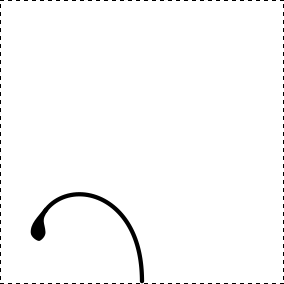

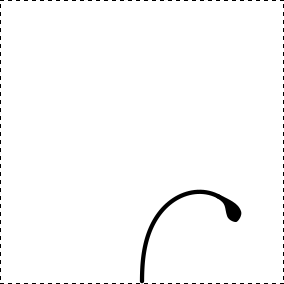

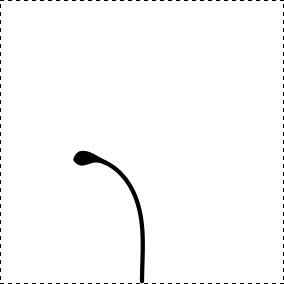

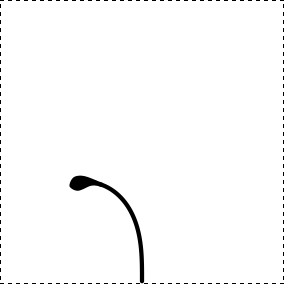

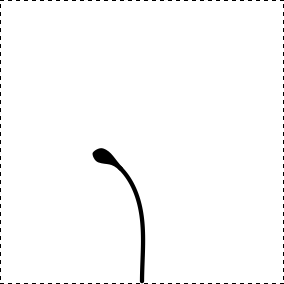

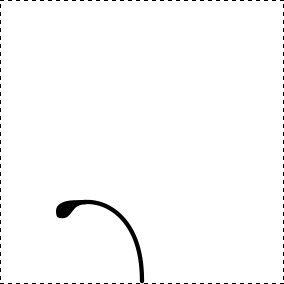

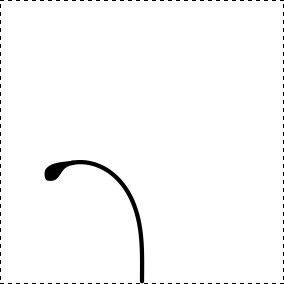

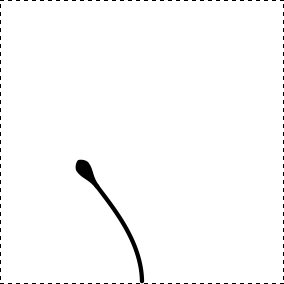

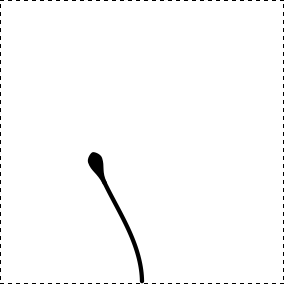

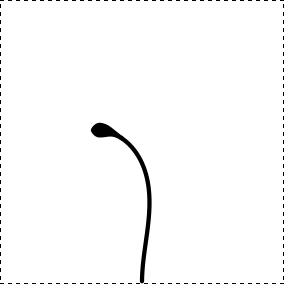

In [8]:
from IPython.display import display

for i in range(10):
    sign = np.random.choice([-1, 1])
    
    drv = np.random.uniform(5, 10) * sign
    rv = np.random.uniform(-2, 1) * sign
    
    length = np.random.uniform(0.50, 0.70)
    
    vine = ClothoidVine.from_edge('bottom', rv=rv, drv=drv, length=length)
    display(vine.draw())

# child要素の検証

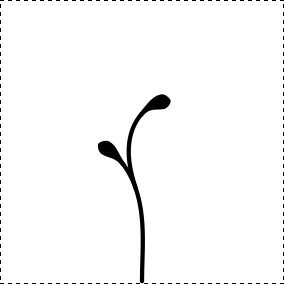

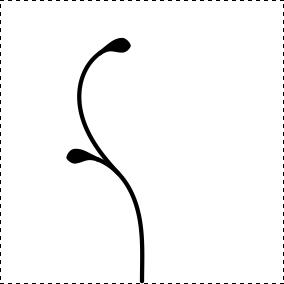

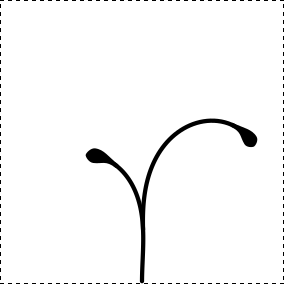

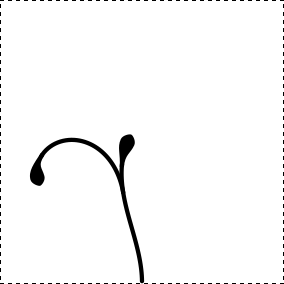

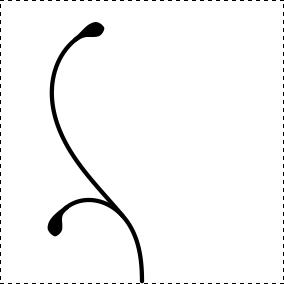

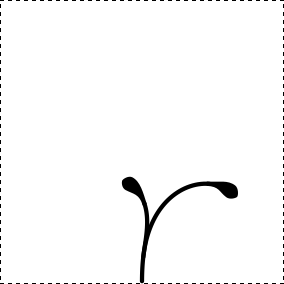

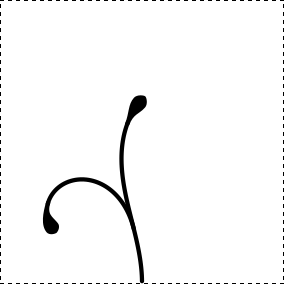

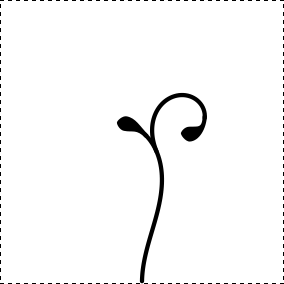

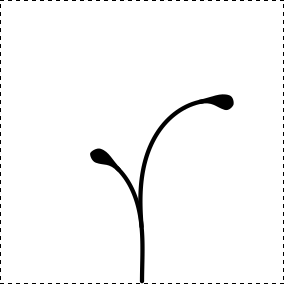

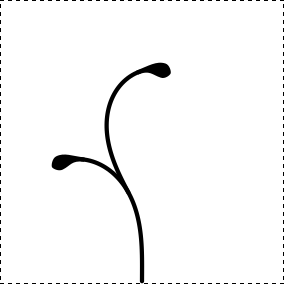

In [12]:
from IPython.display import display

for i in range(10):
    sign = np.random.choice([-1, 1])
    
    drv = np.random.uniform(5, 10) * sign
    rv = np.random.uniform(-2, 1) * sign    
    length = np.random.uniform(0.50, 0.70)
    
    vine = ClothoidVine.from_edge('bottom', rv=rv, drv=drv, length=length)
    
    child_pos = np.random.uniform(0, 0.8)
    child_scale = np.random.uniform(0.5, 1.5)
    vine.create_child(pos=child_pos, scale=child_scale)
    
    display(vine.draw())

# 四方から出たらどうなるか？

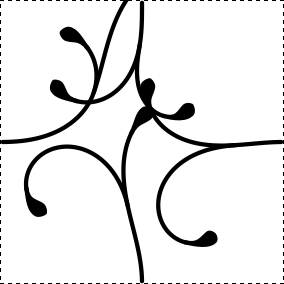

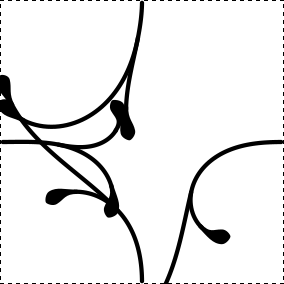

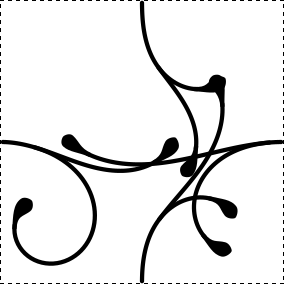

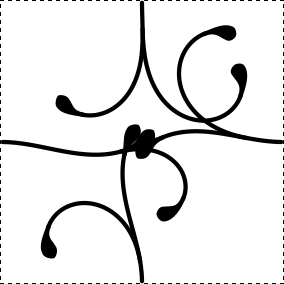

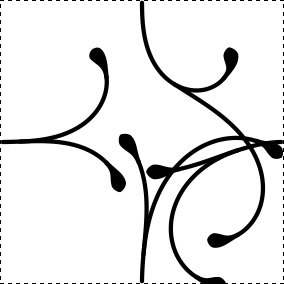

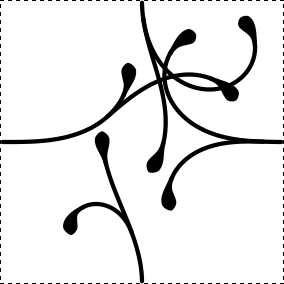

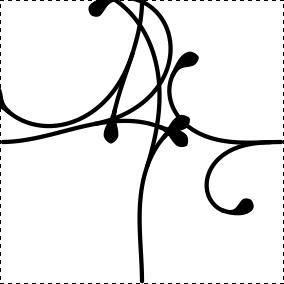

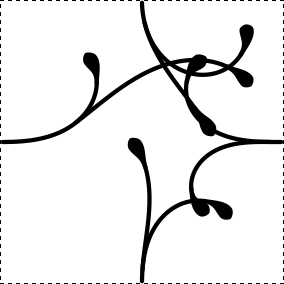

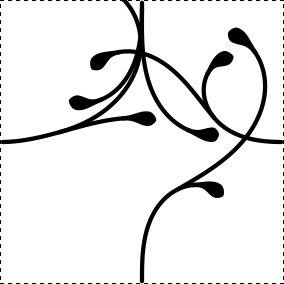

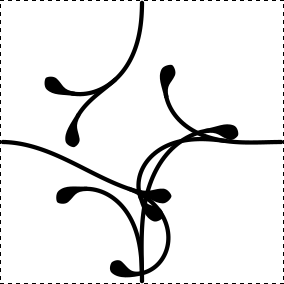

In [14]:
from IPython.display import display

for i in range(10):
    dwg = U.create_drawing()
    
    for edge in ['top', 'bottom', 'left', 'right']:
        sign = np.random.choice([-1, 1])    

        drv = np.random.uniform(5, 10) * sign
        rv = np.random.uniform(-2, 1) * sign    
        length = np.random.uniform(0.50, 0.70)

        vine = ClothoidVine.from_edge(edge, rv=rv, drv=drv, length=length)

        child_pos = np.random.uniform(0, 0.8)
        child_scale = np.random.uniform(0.5, 1.5)
        vine.create_child(pos=child_pos, scale=child_scale)

        vine.draw(dwg)
    display(dwg)

# 四方から出たらどうなるか？という実験をして、これは失敗だが、これはこれで面白い。

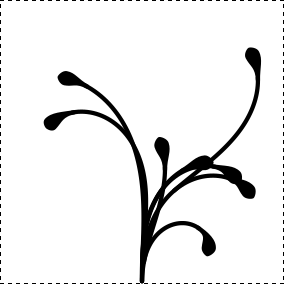

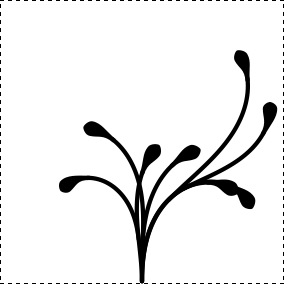

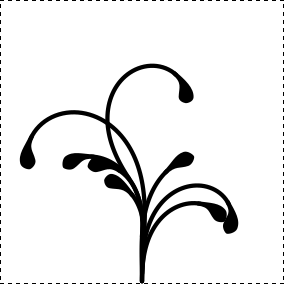

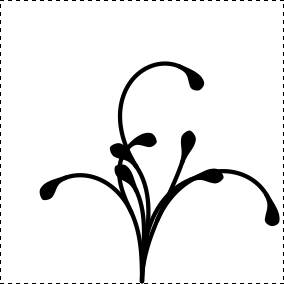

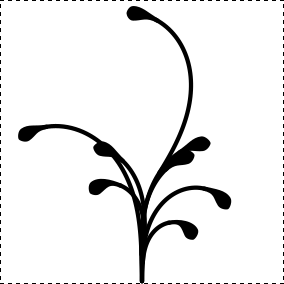

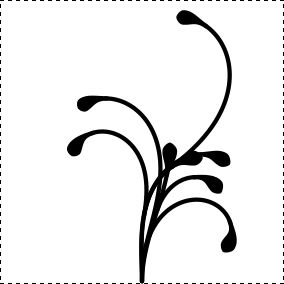

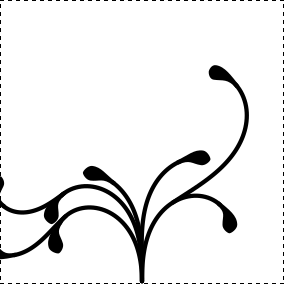

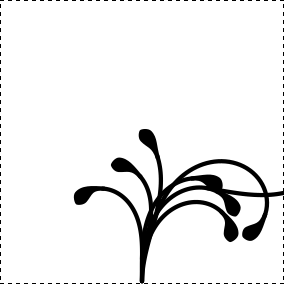

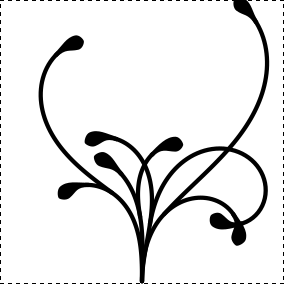

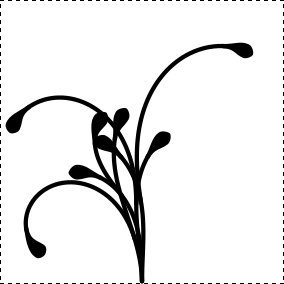

In [44]:
from IPython.display import display

for i in range(10):
    dwg = U.create_drawing()
    
    for edge in ['top', 'bottom', 'left', 'right']:
        sign = np.random.choice([-1, 1])    

        drv = np.random.uniform(5, 10) * sign
        rv = np.random.uniform(-2, 1) * sign    
        length = np.random.uniform(0.50, 0.70)

        vine = ClothoidVine.from_edge('bottom', rv=rv, drv=drv, length=length)

        child_pos = np.random.uniform(0, 0.8)
        child_scale = np.random.uniform(0.5, 1.5)
        vine.create_child(pos=child_pos, scale=child_scale)

        vine.draw(dwg)
    display(dwg)

# 葉と花を足す

これで一旦完成形

In [16]:
from leaf import Leaf
from flower import Flower

In [53]:
from IPython.display import display
from tqdm import tqdm

for index in tqdm(range(256)):
    dwg = U.create_drawing()
    
    vines = []
    for edge in ['top', 'bottom', 'left', 'right']:
        sign = np.random.choice([-1, 1])    

        drv = np.random.uniform(5, 10) * sign
        rv = np.random.uniform(-2, 1) * sign    
        length = np.random.uniform(0.50, 0.70)

        vine = ClothoidVine.from_edge(edge, rv=rv, drv=drv, length=length)

        child_pos = np.random.uniform(0, 0.8)
        child_scale = np.random.uniform(0.5, 1.5)
        vine.create_child(pos=child_pos, scale=child_scale)
        
        vs = [vine] + vine.childs
        
        for _ in range(np.random.randint(0, 2)):
            pos = np.random.uniform(0.1, 0.8)
            side = np.random.choice(['left', 'right'])
            
            v = np.random.choice(vs)            
            v.create_leaf(parent_pos=pos, size=0.25, side=side)
            
        for _ in range(np.random.randint(1, 3)):
            pos = np.random.uniform(0.1, 0.8)
            delta = np.random.uniform(-0.1, 0.1, 2)
            
            v = np.random.choice(vs)            
            v.create_flower(parent_pos=pos, size=0.25, delta_pos=delta)            
            
        vines.append(vine)
        
    for vine in vines:
        vine.draw(dwg, flower=False)
        
    for vine in vines:
        vine.draw(dwg, flower=True, vine=False, leaf=False)
        
    dwg.filename = './results/190917/{:03d}.svg'.format(index)
    dwg.save()
        
    display(dwg)



  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 1/256 [00:03<14:15,  3.35s/it]

  1%|          | 2/256 [00:04<10:59,  2.60s/it]

  1%|          | 3/256 [00:07<11:14,  2.67s/it]

  2%|▏         | 4/256 [00:09<10:31,  2.51s/it]

  2%|▏         | 5/256 [00:12<11:41,  2.80s/it]

  2%|▏         | 6/256 [00:15<11:35,  2.78s/it]

  3%|▎         | 7/256 [00:16<09:59,  2.41s/it]

  3%|▎         | 8/256 [00:19<10:27,  2.53s/it]

  4%|▎         | 9/256 [00:21<09:06,  2.21s/it]

  4%|▍         | 10/256 [00:23<08:56,  2.18s/it]

  4%|▍         | 11/256 [00:24<07:17,  1.79s/it]

  5%|▍         | 12/256 [00:25<06:57,  1.71s/it]

  5%|▌         | 13/256 [00:28<08:20,  2.06s/it]

  5%|▌         | 14/256 [00:30<07:37,  1.89s/it]

  6%|▌         | 15/256 [00:32<07:59,  1.99s/it]

  6%|▋         | 16/256 [00:34<08:18,  2.08s/it]

  7%|▋         | 17/256 [00:35<06:48,  1.71s/it]

  7%|▋         | 18/256 [00:38<08:11,  2.06s/it]

  7%|▋         | 19/256 [00:41<09:03,  2.29s/it]

  8%|▊         |

KeyboardInterrupt: 

# 一旦、完成か、

In [65]:
import glob
import os
from PIL import Image
from tqdm import tqdm_notebook as tqdm

imgs = []

for filename in tqdm(sorted(glob.glob('./results/190917/*.svg'))):
    tmpfile = "results/tmp.png"
    os.system("convert -density 360 {} {}".format(filename, tmpfile))
        
    img = Image.open(tmpfile)
    img = np.array(img)
    imgs.append(img)
    
os.system('rm {}'.format(tmpfile))

0

In [68]:
rows = []
for i in range(8):
    row = []
    for j in range(8):
        row.append(imgs[i * 8 + j])
    row = np.hstack(row)
    rows.append(row)
result = np.vstack(rows)

In [71]:
Image.fromarray(result).convert('RGB').save("results/tiled.jpg")